# TODO:
- Melhorar o nomeamento
- Comentar o código
- Adicionar type hints
- Adicionar docstrings
- Adcionar e treinar o modelo
- Melhorar a função addToSet
- Juntar partes do código

## Docstring example 

``` python
def complex(real=0.0, imag=0.0):
    """Form a complex number.

    Keyword arguments:
    real -- the real part (default 0.0)
    imag -- the imaginary part (default 0.0)
    """
    if imag == 0.0 and real == 0.0:
        return complex_zero
    ...

```

In [2]:
# importando algumas bibliotecas
import os
import numpy as np
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt

from typing import List

# definindo os caminhos para os conjuntos de dados
dataset_path = 'DC-ped-dataset_base'
train_set_1_path_ped = dataset_path + '/1/ped_examples'
train_set_1_path_non_ped = dataset_path  + '/1/non-ped_examples'

train_set_2_path_ped = dataset_path + '/2/ped_examples'
train_set_2_path_non_ped = dataset_path  + '/2/non-ped_examples'

train_set_3_path_ped = dataset_path + '/3/ped_examples'
train_set_3_path_non_ped = dataset_path  + '/3/non-ped_examples'

train_set_4_path_ped = dataset_path + '/T1/ped_examples'
train_set_4_path_non_ped = dataset_path  + '/T1/non-ped_examples'

test_set_path_ped = dataset_path + '/T2/ped_examples'
test_set_path_non_ped = dataset_path  + '/T2/non-ped_examples'

In [3]:
# função que recebe o caminho para as imagens do conjunto de dados e retorna uma matriz numpy correspondente (nesse caso 36 x 18)

def addToSet(images_path) -> List:
    """Retorna uma lista de matrizes das imagens do diretório especificado.
    
    Keyword arguments:
    images_path -- Path to the directory of the images.
    """
    images_data = []
    for pgm_image in os.listdir(images_path):
        pgm_img = Image.open(os.path.join(images_path, pgm_image))
        images_data.append(asarray(pgm_img))
    return images_data

# criando arrays do numpy com as listas geradas pela função addToSet (treino)
train_data_ped_1 = np.array(addToSet(train_set_1_path_ped))
train_data_ped_2 = np.array(addToSet(train_set_2_path_ped))
train_data_ped_3 = np.array(addToSet(train_set_3_path_ped))
train_data_ped_4 = np.array(addToSet(train_set_4_path_ped))

# concatenando os dados em 1 conjunto só
ped_train_set = np.concatenate((train_data_ped_1,train_data_ped_2, train_data_ped_3, train_data_ped_4))

# mesmo processo só que com os dados de não pedestres (treino)
train_data_non_ped_1 = np.array(addToSet(train_set_1_path_non_ped))
train_data_non_ped_2 = np.array(addToSet(train_set_2_path_non_ped))
train_data_non_ped_3 = np.array(addToSet(train_set_3_path_non_ped))
train_data_non_ped_4 = np.array(addToSet(train_set_4_path_non_ped))

non_ped_train_set = np.concatenate((train_data_non_ped_1, train_data_non_ped_2, train_data_non_ped_3, train_data_non_ped_4))

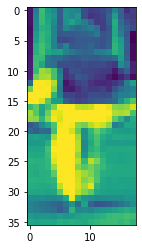

In [4]:
%matplotlib inline
plt.imshow(ped_train_set[1])

In [5]:
test_data_ped = np.array(addToSet(test_set_path_ped))
test_data_non_ped = np.array(addToSet(test_set_path_non_ped))

test_ped_labels = np.ones(len(test_data_ped))
test_non_ped_labels = np.zeros(len(test_data_non_ped))

In [6]:
ped_train_set[1].shape

(36, 18)

In [7]:
non_flattened_test_set = np.array(np.concatenate((test_data_ped, test_data_non_ped)))
non_shulffled_test_set = non_flattened_test_set.reshape(9800, 648)
non_shuffled_test_set_labels = np.array(np.concatenate((test_ped_labels, test_non_ped_labels)))

test_set = non_shulffled_test_set
test_set_labels = non_shuffled_test_set_labels

np.random.seed(17)

test_shuffle_index = np.random.permutation(len(test_set))

test_set, test_set_labels = test_set[test_shuffle_index], test_set_labels[test_shuffle_index]

In [8]:
# criando as labels para as imagens de pedestres dos conjuntos de teste
train_ped_labels = []

for i in range(0, len(ped_train_set)):
    train_ped_labels.append(1) 

# pedestres serão representados pelo valor 1

In [9]:
train_non_ped_labels = []

for i in range(0, len(non_ped_train_set)):
    train_non_ped_labels.append(0) 

# não pedestres serão representados pelo valor 0

In [10]:
# concatenando pedestres com não pedestres e suas respectivas labels
train_non_ped_labels = np.array(train_non_ped_labels)
train_ped_labels = np.array(train_ped_labels)

all_non_shuffled_labels = np.concatenate((train_ped_labels, train_non_ped_labels)) 
non_shuffled_train_set = np.concatenate((ped_train_set, non_ped_train_set))

In [11]:
# conjunto de treino final e labels finais
non_flattened_train_set, train_set_labels = non_shuffled_train_set, all_non_shuffled_labels

train_set = non_flattened_train_set.reshape(39200, 648)

np.random.seed(42)

# embaralhando os conjuntos de dados e labels
shuffle_index = np.random.permutation(len(train_set))
train_set, train_set_labels = train_set[shuffle_index], train_set_labels[shuffle_index]